In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\admin\\Desktop\\Dataset\\Summer\\summer-products-with-rating-and-performance_2020-08.csv")
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [3]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [4]:
target_col = 'units_sold'

print(f"Shape of dataframe {df.shape}")

rows = []

for col in df.columns:
    if df[col].isin([0, 1, np.nan]).all():
        
        row_dict = {'ColumnName': col, 'DataType': 'binary', 'HasMissing': df.isnull().any().loc[col],
                    'NumberOfMissingCells': df.isnull().sum().loc[col], 'CorrelationWithTarget': df.corr()[target_col].loc[col],
                    'Mean': np.nan, 'Median': np.nan, 'Mode': df.mode()[col].loc[0], 'MinValue': np.nan, 'MaxValue': np.nan}
        
    elif df.dtypes.loc[col] == 'int64' or df.dtypes.loc[col] == 'float64':
            
        row_dict = {'ColumnName': col, 'DataType': df.dtypes.loc[col], 'HasMissing': df.isnull().any().loc[col],
                    'NumberOfMissingCells': df.isnull().sum().loc[col], 'CorrelationWithTarget': df.corr()[target_col].loc[col],
                    'Mean': df.mean().loc[col], 'Median': df.median().loc[col], 'Mode': df.mode()[col].loc[0], 
                    'MinValue': df.min().loc[col], 'MaxValue': df.max().loc[col]}
        
    else:
        
        row_dict = {'ColumnName': col, 'DataType': df.dtypes.loc[col], 'HasMissing': df.isnull().any().loc[col],
                    'NumberOfMissingCells': df.isnull().sum().loc[col], 'CorrelationWithTarget': np.nan,
                    'Mean': np.nan, 'Median': np.nan, 'Mode': df.mode()[col].loc[0], 'MinValue': np.nan, 'MaxValue': np.nan}
        
    rows.append(row_dict)
        
info_df = pd.DataFrame(rows, columns = ['ColumnName', 'DataType', 'HasMissing', 'NumberOfMissingCells', 'CorrelationWithTarget',
                                        'Mean', 'Median', 'Mode', 'MinValue', 'MaxValue'])

info_df.set_index('ColumnName', inplace = True)

info_df = info_df.sort_values('CorrelationWithTarget', ascending = False, na_position = 'last')

print("FOR NUMERICAL COLUMNS")
info_df[info_df['DataType'] != 'object']

Shape of dataframe (1573, 43)
FOR NUMERICAL COLUMNS


,DataType,HasMissing,NumberOfMissingCells,CorrelationWithTarget,Mean,Median,Mode,MinValue,MaxValue
ColumnName,,,,,,,,,
units_sold,int64,False,0,1.000000,4339.005086,1000.00000,100,1.000000,100000.0
rating_count,int64,False,0,0.899464,889.659250,150.00000,0,0.000000,20744.0
rating_three_count,float64,True,45,0.894243,134.549738,24.00000,0,0.000000,3658.0
rating_four_count,float64,True,45,0.891116,179.599476,31.50000,0,0.000000,4152.0
rating_five_count,float64,True,45,0.876231,442.263743,79.00000,1,0.000000,11548.0
rating_two_count,float64,True,45,0.866685,63.711387,11.00000,0,0.000000,2003.0
rating_one_count,float64,True,45,0.832816,95.735602,20.00000,0,0.000000,2789.0
merchant_rating_count,int64,False,0,0.272897,26495.832804,7936.00000,32168,0.000000,2174765.0
merchant_has_profile_picture,binary,False,0,0.143529,NaN,NaN,0,NaN,NaN


In [5]:
info_df[info_df['DataType'] == 'object'] 

,DataType,HasMissing,NumberOfMissingCells,CorrelationWithTarget,Mean,Median,Mode,MinValue,MaxValue
ColumnName,,,,,,,,,
title,object,False,0,NaN,NaN,NaN,Nouvelle mode d'été femmes robe décontractée c...,NaN,NaN
title_orig,object,False,0,NaN,NaN,NaN,New Fashion Summer Women Casual Dress Round Ne...,NaN,NaN
currency_buyer,object,False,0,NaN,NaN,NaN,EUR,NaN,NaN
tags,object,False,0,NaN,NaN,NaN,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",NaN,NaN
product_color,object,True,41,NaN,NaN,NaN,black,NaN,NaN
product_variation_size_id,object,True,14,NaN,NaN,NaN,S,NaN,NaN
shipping_option_name,object,False,0,NaN,NaN,NaN,Livraison standard,NaN,NaN
urgency_text,object,True,1100,NaN,NaN,NaN,Quantité limitée !,NaN,NaN
origin_country,object,True,17,NaN,NaN,NaN,CN,NaN,NaN


In [6]:
print("For Categorocal/Non-Numeric Columns")
info_df[info_df['DataType']=='object'].drop(['CorrelationWithTarget', 'Mean', 'Median', 'MinValue', 'MaxValue'], axis='columns')

For Categorocal/Non-Numeric Columns


,DataType,HasMissing,NumberOfMissingCells,Mode
ColumnName,,,,
title,object,False,0,Nouvelle mode d'été femmes robe décontractée c...
title_orig,object,False,0,New Fashion Summer Women Casual Dress Round Ne...
currency_buyer,object,False,0,EUR
tags,object,False,0,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'..."
product_color,object,True,41,black
product_variation_size_id,object,True,14,S
shipping_option_name,object,False,0,Livraison standard
urgency_text,object,True,1100,Quantité limitée !
origin_country,object,True,17,CN


Text(0.5, 1.0, "f'Features Correlation with {target_col}', fontdict = {'fontsize': 18}, pad = 16")

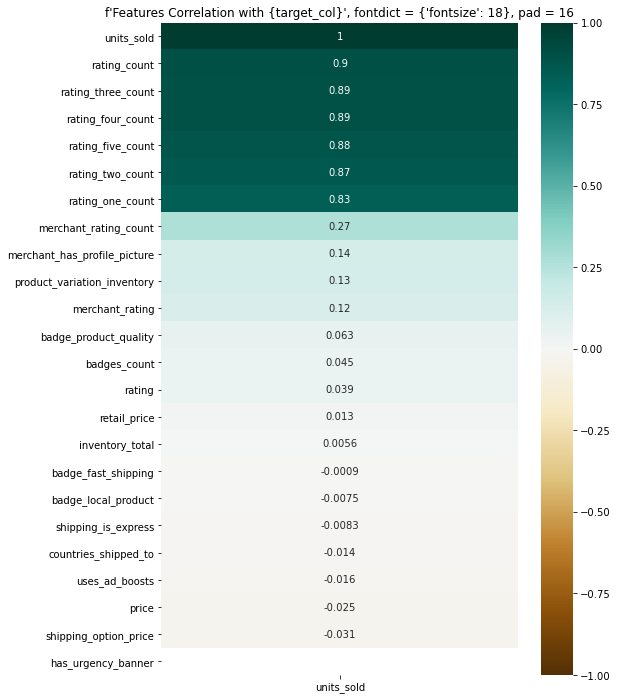

In [7]:
import seaborn as sns

plt.figure(figsize = (8, 12))
heatmap = sns.heatmap(df.corr()[[target_col]].sort_values(by = target_col, ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title("f'Features Correlation with {target_col}', fontdict = {'fontsize': 18}, pad = 16")

# Let's first start with categorical features and process them

1. currency_buyer

In [8]:
df['currency_buyer'].unique()

array(['EUR'], dtype=object)

2. product_color

Has 41 missing values and most common value is black

In [9]:
count = df['product_color'].value_counts()
count

black                  302
white                  254
yellow                 105
blue                    99
pink                    99
                      ... 
orange & camouflage      1
offwhite                 1
red & blue               1
darkgreen                1
leopardprint             1
Name: product_color, Length: 101, dtype: int64

In [10]:
np.sort(df['product_color'].dropna().unique())

array(['Army green', 'Black', 'Blue', 'Pink', 'RED', 'Rose red', 'White',
       'applegreen', 'apricot', 'army', 'army green', 'armygreen',
       'beige', 'black', 'black & blue', 'black & green',
       'black & stripe', 'black & white', 'black & yellow', 'blackwhite',
       'blue', 'blue & pink', 'brown', 'brown & yellow', 'burgundy',
       'camel', 'camouflage', 'claret', 'coffee', 'coolblack', 'coralred',
       'darkblue', 'darkgreen', 'denimblue', 'dustypink', 'floral',
       'fluorescentgreen', 'gold', 'gray', 'gray & white', 'green',
       'grey', 'greysnakeskinprint', 'ivory', 'jasper', 'khaki',
       'lakeblue', 'leopard', 'leopardprint', 'light green', 'lightblue',
       'lightgray', 'lightgreen', 'lightgrey', 'lightkhaki', 'lightpink',
       'lightpurple', 'lightred', 'lightyellow', 'mintgreen',
       'multicolor', 'navy', 'navy blue', 'navyblue', 'navyblue & white',
       'nude', 'offblack', 'offwhite', 'orange', 'orange & camouflage',
       'orange-red', 'pink

In [11]:
df['product_color'] = df['product_color'].str.lower()

In [12]:
df[df['product_color'].str.contains('&', na = False)]['product_color'].unique()

array(['red & blue', 'blue & pink', 'white & green', 'black & green',
       'orange & camouflage', 'pink & black', 'pink & grey',
       'black & white', 'white & black', 'pink & white', 'pink & blue',
       'black & stripe', 'gray & white', 'brown & yellow',
       'winered & yellow', 'navyblue & white', 'white & red',
       'black & yellow', 'black & blue'], dtype=object)

In [13]:
shade_to_colour = {'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 
                   'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue', 'navy': 'blue',
                   
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 
    'lightgreen': 'green', 'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
                   
    'lightyellow': 'yellow',
                   
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 
    'orange-red': 'red', 'rosered': 'red', 'claret': 'red', 'burgundy': 'red',
                   
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
                   
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown',
                   
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
                   
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
                   
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'}

def update_color(col): 
    if shade_to_colour.get(col, False):
        return shade_to_colour.get(col)
    
    elif '&' in col: 
        return 'dual'
    
    elif col in shade_to_colour.values():
        return col
    
    else:
        return 'other'
    
df['product_color'].replace(np.nan, 'others', inplace = True)

df['product_color'] = df.product_color.apply(update_color)

In [14]:
count = df['product_color'].value_counts()
count

black     308
white     260
blue      164
green     151
red       144
pink      108
yellow    107
other     104
grey       87
purple     54
dual       40
orange     29
brown      17
Name: product_color, dtype: int64

In [15]:
df['product_color']

0        white
1        green
2        other
3        black
4       yellow
         ...  
1568      blue
1569      blue
1570     white
1571     white
1572       red
Name: product_color, Length: 1573, dtype: object

In [16]:
col_df = df.groupby('product_color')['units_sold'].agg('sum').sort_values(ascending = False).to_frame()
col_df.reset_index(level = 0, inplace = True)
#col_df = col_df.reset_index(level = 0)
col_df

,product_color,units_sold
0,black,1609463
1,white,1174227
2,other,641222
3,blue,582808
4,green,580245
5,grey,512740
6,red,495400
7,purple,339480
8,pink,310650
9,yellow,228212


<AxesSubplot:xlabel='product_color', ylabel='units_sold'>

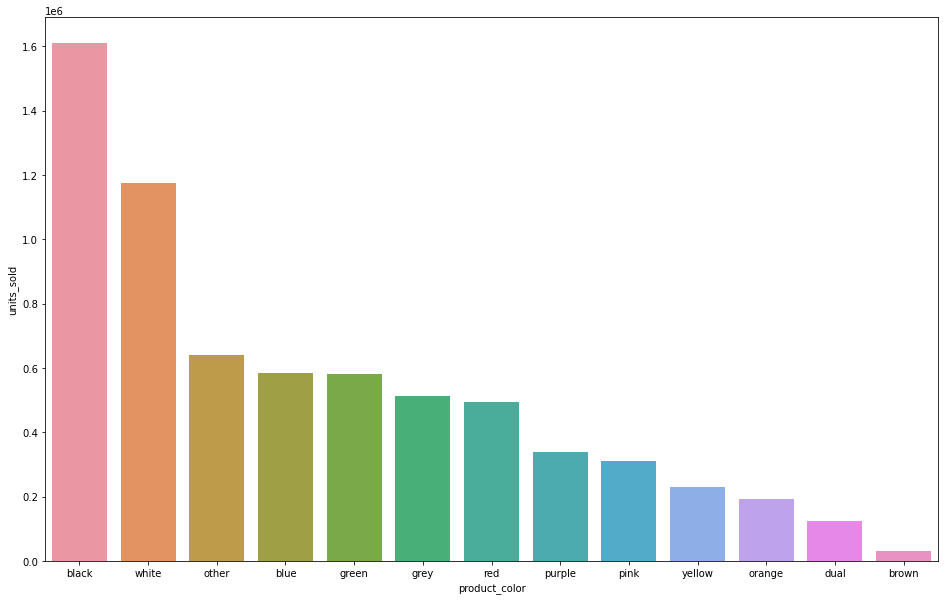

In [17]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_color", y="units_sold", data=col_df)

# Tags

#No Missing Value

In [18]:
df['tags_count'] = df['tags'].str.split(',').str.len()

<AxesSubplot:xlabel='tags_count', ylabel='units_sold'>

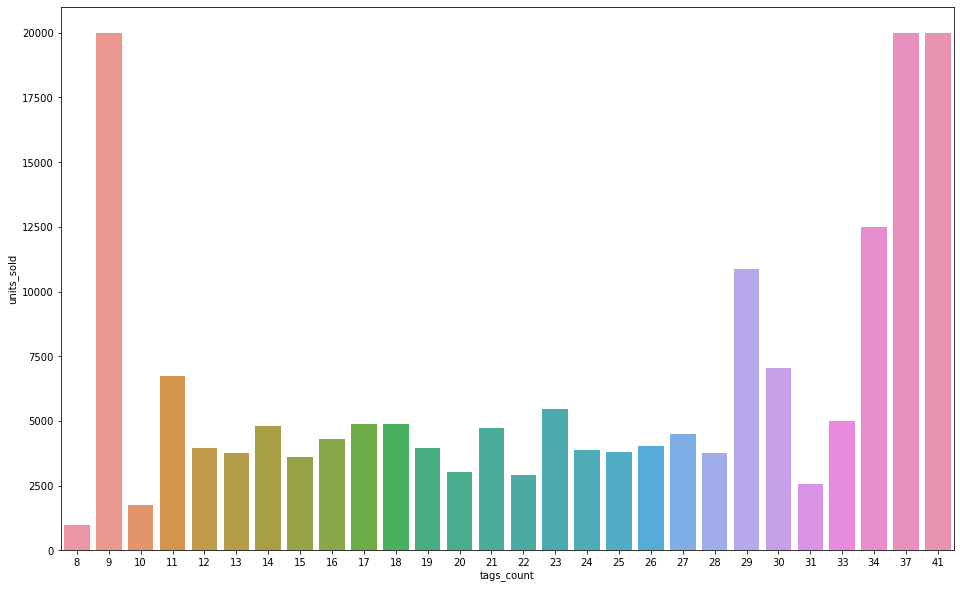

In [19]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.barplot(x = "tags_count", y = "units_sold", ci = None, data = df)

<AxesSubplot:xlabel='tags_count', ylabel='units_sold'>

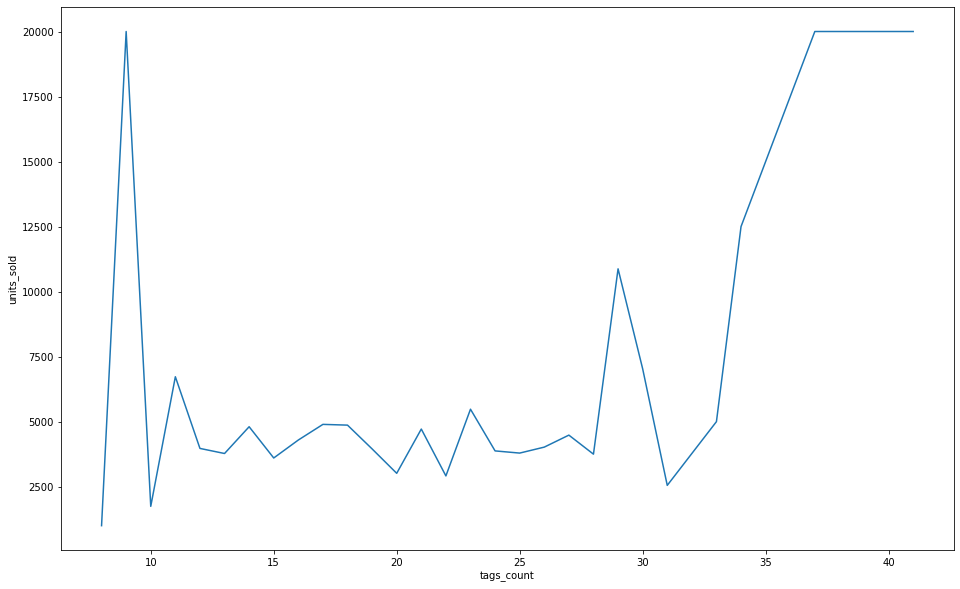

In [20]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.lineplot(x = "tags_count", y = "units_sold", ci = None, data = df)

In [21]:
df[df['tags_count'] <= 10]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tags_count
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08,10
12,Shorts de causalité d'été de nouvelles femmes ...,New Women's Summer Causal Shorts Drawstring Sh...,1.91,6,EUR,1000,1,3.45,141,49.0,...,4.123878,5d3c419de4b65d4fb81e7286,0,NaN,https://www.wish.com/c/5e9da39dc737cf255eddd4bf,https://contestimg.wish.com/api/webimage/5e9da...,5e9da39dc737cf255eddd4bf,summer,2020-08,8
42,NOUVEAU Red Bull Summer Mens Casual Shorts Pan...,NEW Red Bull Summer Mens Casual Shorts Pants L...,12.00,14,EUR,100,1,3.79,24,11.0,...,4.020408,5e5c7c2c77179e31406eece1,0,NaN,https://www.wish.com/c/5ea7e2d999ecf941204c42ee,https://contestimg.wish.com/api/webimage/5ea7e...,5ea7e2d999ecf941204c42ee,summer,2020-08,10
61,Pantalon de couleur unie à la mode pour femmes...,Women s New Fashion Solid Color Pants Loose Ca...,5.00,38,EUR,50,1,5.00,2,2.0,...,3.666667,5e4b6a0c57cc9b0b53e499a4,0,NaN,https://www.wish.com/c/5eba6ecb9a9e129fb97b5dfd,https://contestimg.wish.com/api/webimage/5eba6...,5eba6ecb9a9e129fb97b5dfd,summer,2020-08,10
87,Femmes 2019 Mode Bandage de mode 2019 Maillot ...,Women's 2019 Fashion Bandage SwimSuits Colorbl...,5.78,8,EUR,20000,1,4.00,3975,2054.0,...,4.184134,5b2620ddd1c360688799eb51,0,NaN,https://www.wish.com/c/5c061cf358603c4b35a19363,https://contestimg.wish.com/api/webimage/5c061...,5c061cf358603c4b35a19363,summer,2020-08,9
95,Pantalon de couleur unie à la mode pour femmes...,Women s New Fashion Solid Color Pants Loose Ca...,1.86,9,EUR,100,1,3.57,42,17.0,...,3.943019,56c94ae6df108f5af83b1e0f,0,NaN,https://www.wish.com/c/5e958754a9136f26ddb12929,https://contestimg.wish.com/api/webimage/5e958...,5e958754a9136f26ddb12929,summer,2020-08,10
428,NOUVEAU Red Bull Summer Mens Casual Shorts Pan...,NEW Red Bull Summer Mens Casual Shorts Pants L...,12.00,14,EUR,50,0,3.88,8,2.0,...,3.884615,5e5cb2f077179e1ac07004a2,0,NaN,https://www.wish.com/c/5ea7e2d9d113700dcbc76b82,https://contestimg.wish.com/api/webimage/5ea7e...,5ea7e2d9d113700dcbc76b82,summer,2020-08,10
460,100 pcs Été Jetable Sweat Pad Transpiration Ab...,100pcs Summer Disposable Sweat Pad Perspiratio...,9.00,46,EUR,100,0,4.86,7,6.0,...,4.228007,59815a929fbc512d72137ba5,0,NaN,https://www.wish.com/c/5e70ba09e3d51e1002f7cf8e,https://contestimg.wish.com/api/webimage/5e70b...,5e70ba09e3d51e1002f7cf8e,summer,2020-08,10
476,Mode Femmes Salopette D'été Bavoir Pantalon Sh...,Fashion Womens Jumpsuit Summer Bib Pants Short...,11.00,108,EUR,5000,0,2.95,299,72.0,...,3.873083,5ba8dffeb2f5b12221c73576,0,NaN,https://www.wish.com/c/5d6e5c9b045a156519de6483,https://contestimg.wish.com/api/webimage/5d6e5...,5d6e5c9b045a156519de6483,summer,2020-08,10
527,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.83,4,EUR,100,0,3.57,67,27.0,...,3.958790,56fba259138ef73c2a749a56,0,NaN,https://www.wish.com/c/5e12c01191235958ecdd6285,https://contestimg.wish.com/api/webimage/5e12c...,5e12c01191235958ecdd6285,summer,2020-08,10


# 3. product_variation_size_id

In [22]:
df['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

In [23]:
df['product_variation_size_id'].value_counts(ascending = False)

S           641
XS          356
M           200
XXS         100
L            49
           ... 
30 cm         1
XXXL          1
SIZE XXS      1
100 cm        1
Size XXS      1
Name: product_variation_size_id, Length: 106, dtype: int64

In [24]:
df['product_variation_size_id'] = df['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')

In [25]:
df['product_variation_size_id'].unique()

array(['m', 'xs', 's', 'xxs', 'l', 'xxl', nan, 'choose a size', '32/l',
       'suit-s', 'xxxxxl', 'eu 35', '4', '1m by 3m', '3xl', 'xl',
       'women 36', 'us 65 (eu 37)', 'xxxs', '26(waist 72cm 28inch)', '29',
       '1pc', '100 cm', 'one size', '4xl', '1', 's/m(child)', '2pcs',
       'xxxl', '30 cm', '5xl', '33', '100 x 100cm(393 x 393inch)',
       '100pcs', '2xl', 'sizel', 'xxxxl', 'base & top & matte top coat',
       '35', '34', 's(bust 88cm)', 's (waist58-62cm)', 's(pink & black)',
       '20pcs', 'us-s', 'x   l', 'white', '25', 'round', 'pack of 1',
       '1 pc', 's diameter 30cm', '6xl', 'au plug low quality', '5pairs',
       '25-s', 's pink', 'daughter 24m', '2', 'baby float boat', '10 ml',
       '60', 'us55-eu35', '10pcs', '17', 'women 37', '3 layered anklet',
       '4-5 years', 'size4xl', 'first  generation', '80 x 200 cm',
       'eu39(us8)', 'base coat', '36', '04-3xl', 'pants-s',
       'floating chair for kid', '20pcs-10pairs', 'b', '5', '1 pc - xl',
       'h01'

In [26]:
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('3xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('5xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('6xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('sizel', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('size4xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('x   l', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('1 pc - xl', 'xl')

In [27]:
c = df['product_variation_size_id'].value_counts()
c

s                680
xs               369
m                206
xxs              107
l                 51
                ... 
30 cm              1
us55-eu35          1
80 x 200 cm        1
20pcs-10pairs      1
1m by 3m           1
Name: product_variation_size_id, Length: 73, dtype: int64

In [28]:
def change_size(cl):
    if cl in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return cl
    else:
        return 'other'

df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, 'OTHER')
df['product_variation_size_id'] = df['product_variation_size_id'].apply(change_size)

In [29]:
c = df['product_variation_size_id'].value_counts()
c

s         680
xs        369
m         206
other     202
l          51
xl         40
xxl        15
xxxs        6
xxxxl       2
xxxxxl      2
Name: product_variation_size_id, dtype: int64

<AxesSubplot:xlabel='product_variation_size_id', ylabel='units_sold'>

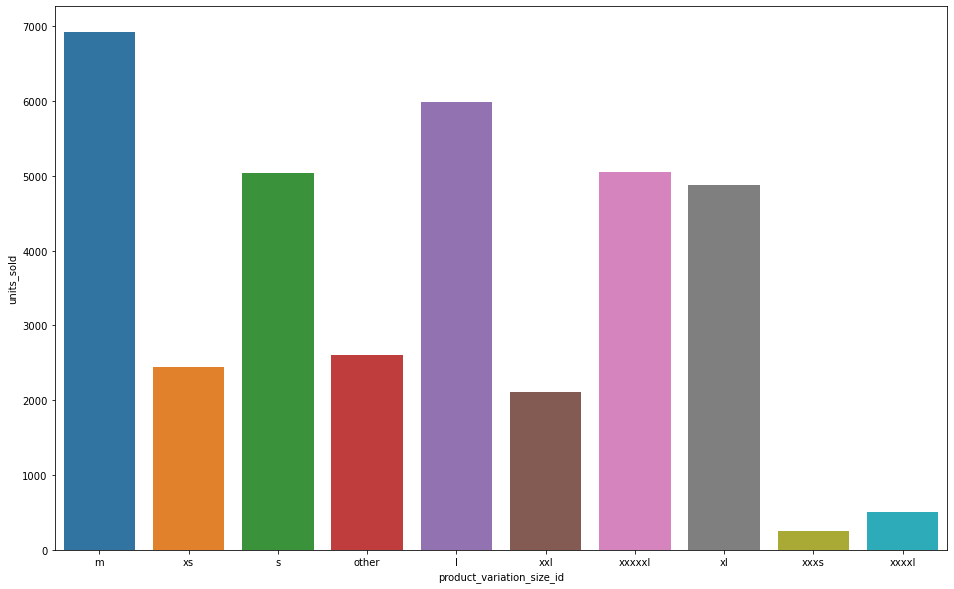

In [30]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.barplot(x="product_variation_size_id", y="units_sold", data=df, ci = None)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_variation_size_id', ylabel='count'>

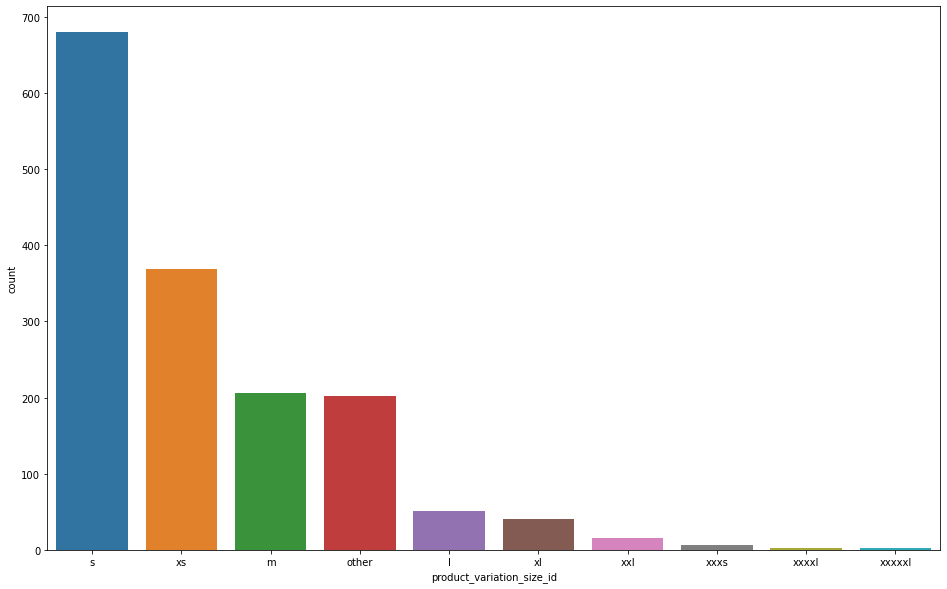

In [31]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.countplot("product_variation_size_id",order = df['product_variation_size_id'].value_counts().index, data=df)

Here we can see that Majority of the products are of size 'S' but the size 'M' has most units_sold

shipping_option_name

In [32]:
df.groupby('shipping_option_name').agg(['count', 'sum'])['units_sold']

,count,sum
shipping_option_name,,
Ekspresowa wysyłka,1,10000
Envio Padrão,9,22400
Envío normal,5,16100
Expediere Standard,6,2400
Livraison Express,3,1200
Livraison standard,1508,6610705
Spedizione standard,2,1100
Standard Shipping,21,88550
Standardowa wysyłka,3,30100


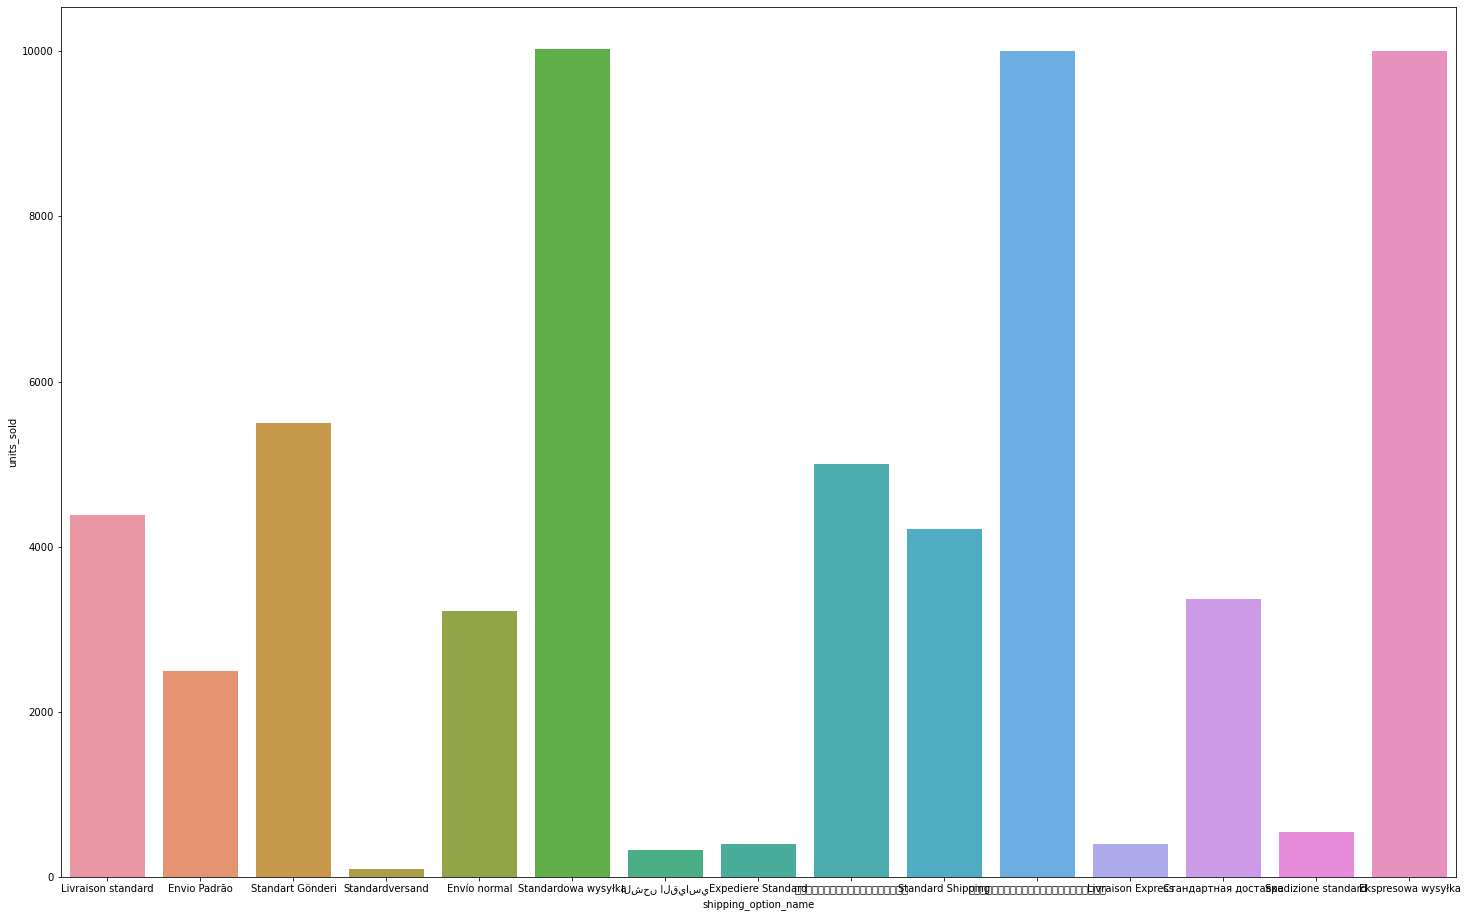

In [33]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.gcf()
fig.set_size_inches(25, 16)
sns.barplot(x = 'shipping_option_name', y = 'units_sold', data = df, ci = None)
plt.show()

# urgency_text 

In [34]:
df.urgency_text.value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

Let's drop urgency_text, title, title_orig, currency_buyer, urgency_tex, merchant_title,merchant_name, merchant_id,merchant_profile_picture,product_url object, product_picture, product_id, theme and crawl_month

In [35]:
#df = df.drop(['urgency_text', 'title', 'title_orig', 'currency_buyer', 'merchant_title', 'merchant_name', 'merchant_id', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'theme', 'crawl_month'], axis = 'columns')

In [36]:
#df.columns

# origin_country

In [37]:
df.groupby('origin_country').agg(['count', 'sum'])['units_sold']

,count,sum
origin_country,,
AT,1,100
CN,1516,6651245
GB,1,1000
SG,2,20100
US,31,43560
VE,5,350


In [38]:
list_of_na_merchants = df[df['origin_country'].isna()]['merchant_id'].values

for x in list_of_na_merchants:
    print("Merchant Title: ", x)
    print(df[df['merchant_id'] == x]['origin_country'])

Merchant Title:  5268759b736046671957190c
56      NaN
507     NaN
921     NaN
1147    NaN
1289    NaN
Name: origin_country, dtype: object
Merchant Title:  5177b0b63feb620dd802a197
180     NaN
802     NaN
1059    NaN
1229    NaN
1256    NaN
Name: origin_country, dtype: object
Merchant Title:  52bd3ddb34067e4620a4c62d
498     NaN
943     NaN
1296    NaN
Name: origin_country, dtype: object
Merchant Title:  5268759b736046671957190c
56      NaN
507     NaN
921     NaN
1147    NaN
1289    NaN
Name: origin_country, dtype: object
Merchant Title:  542a670d4f66d92eba599455
547    NaN
Name: origin_country, dtype: object
Merchant Title:  52838e612dcc6469fa2d7104
632    NaN
679    NaN
Name: origin_country, dtype: object
Merchant Title:  52838e612dcc6469fa2d7104
632    NaN
679    NaN
Name: origin_country, dtype: object
Merchant Title:  5177b0b63feb620dd802a197
180     NaN
802     NaN
1059    NaN
1229    NaN
1256    NaN
Name: origin_country, dtype: object
Merchant Title:  5268759b736046671957190c
56 

In [39]:
df['origin_country'] = df['origin_country'].fillna('CN')

In [40]:
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tags_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,24
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,15
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,19
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,18
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08,24
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08,18
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08,12
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08,21


# units_sold

In [41]:
df['success'] = df['units_sold'].apply(lambda x:1 if x > 1000 else 0)

# rating_counts
no missing values, highest correlation with target

<AxesSubplot:xlabel='rating_count', ylabel='units_sold'>

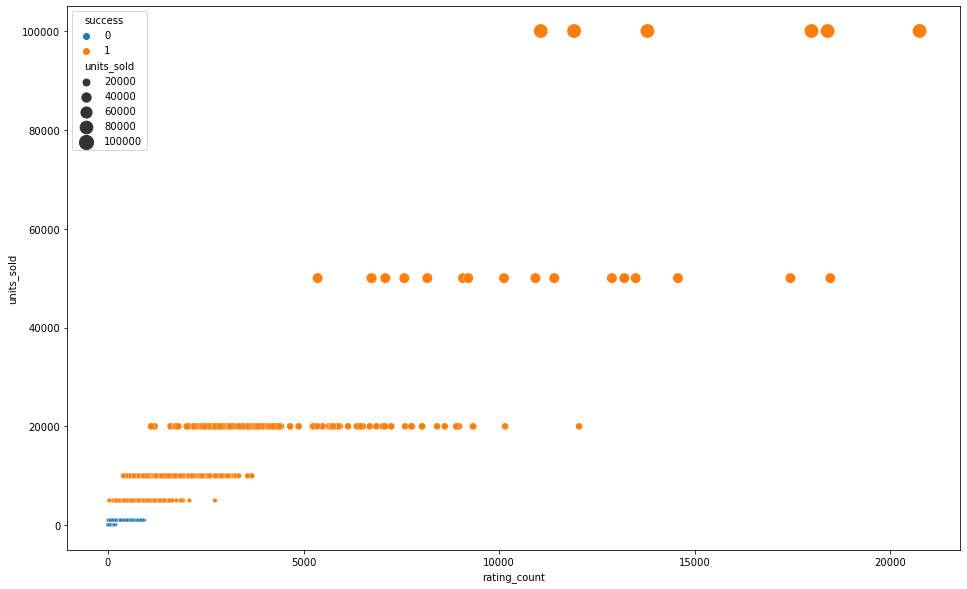

In [42]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.scatterplot(data = df, x = "rating_count", y = "units_sold", hue = 'success', size = 'units_sold', sizes=(10, 200))

# rating_five_counts, rating_four_counts, rating_three_counts, rating_two_counts, rating_one_counts

In [43]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [44]:
df.update(df[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']].fillna(0))
df.loc[df['rating_count'] == 0, 'rating'] = 0

In [45]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [46]:
df[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']].head()

,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,26.0,8.0,10.0,1.0,9.0
1,2269.0,1027.0,1118.0,644.0,1077.0
2,5.0,4.0,2.0,0.0,3.0
3,295.0,119.0,87.0,42.0,36.0
4,6.0,4.0,2.0,2.0,6.0


<AxesSubplot:xlabel='success', ylabel='rating_five_count'>

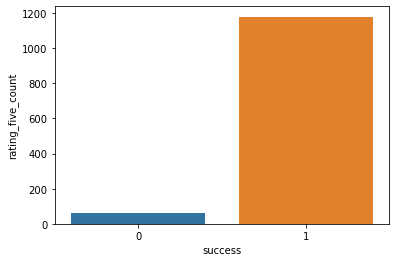

In [47]:
sns.barplot(x = 'success', y = 'rating_five_count', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_one_count'>

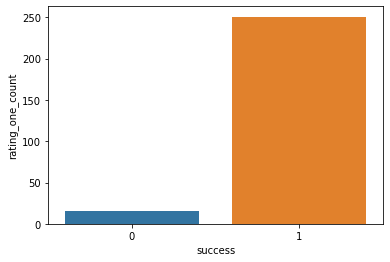

In [48]:
sns.barplot(x = 'success', y = 'rating_one_count', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_two_count'>

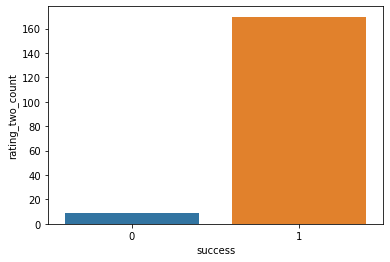

In [49]:
sns.barplot(x = 'success', y = 'rating_two_count', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_four_count'>

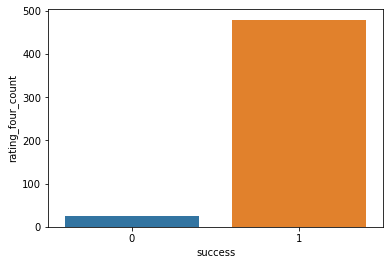

In [50]:
sns.barplot(x = 'success', y = 'rating_four_count', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_three_count'>

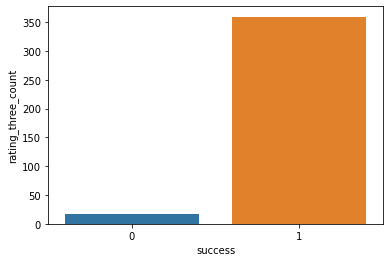

In [51]:
sns.barplot(x = 'success', y = 'rating_three_count', data = df, ci = None)

In [52]:
df['rating_one_count_proportion'] = df['rating_one_count']/df['rating_count']
df['rating_two_count_proportion'] = df['rating_two_count']/df['rating_count']
df['rating_three_count_proportion'] = df['rating_three_count']/df['rating_count']
df['rating_four_count_proportion'] = df['rating_four_count']/df['rating_count']
df['rating_five_count_proportion'] = df['rating_five_count']/df['rating_count']
df.update(df[['rating_one_count_proportion', 'rating_two_count_proportion', 'rating_three_count_proportion', 'rating_four_count_proportion', 'rating_five_count_proportion']].fillna(0))

<AxesSubplot:xlabel='success', ylabel='rating_one_count_proportion'>

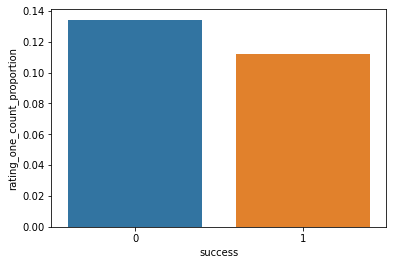

In [53]:
sns.barplot(x = 'success', y = 'rating_one_count_proportion', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_two_count_proportion'>

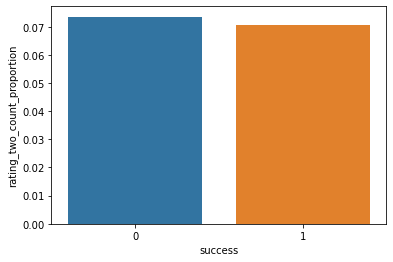

In [54]:
sns.barplot(x = 'success', y = 'rating_two_count_proportion', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_three_count_proportion'>

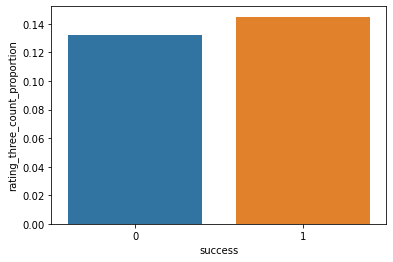

In [55]:
sns.barplot(x = 'success', y = 'rating_three_count_proportion', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_four_count_proportion'>

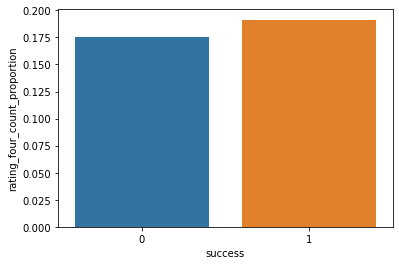

In [56]:
sns.barplot(x = 'success', y = 'rating_four_count_proportion', data = df, ci = None)

<AxesSubplot:xlabel='success', ylabel='rating_five_count_proportion'>

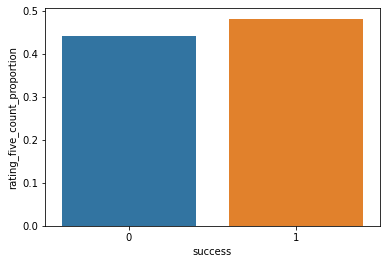

In [57]:
sns.barplot(x = 'success', y = 'rating_five_count_proportion', data = df, ci = None)

# merchant_rating_count

high correlation with no missing value

# merchant_has_profile_profile

<AxesSubplot:xlabel='merchant_has_profile_picture', ylabel='count'>

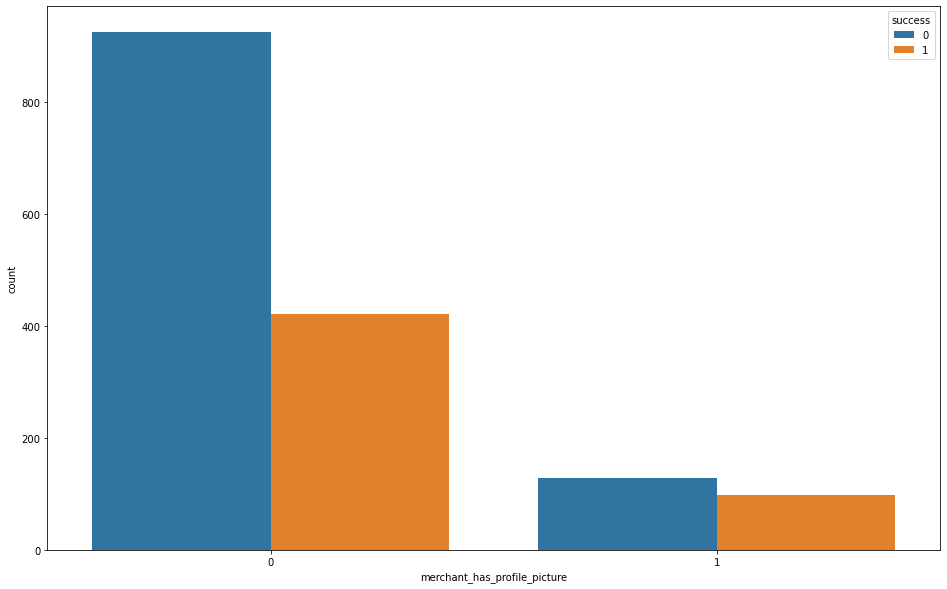

In [58]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.countplot(data = df, x = 'merchant_has_profile_picture', hue = 'success')

# merchant_rating

<AxesSubplot:xlabel='success', ylabel='merchant_rating'>

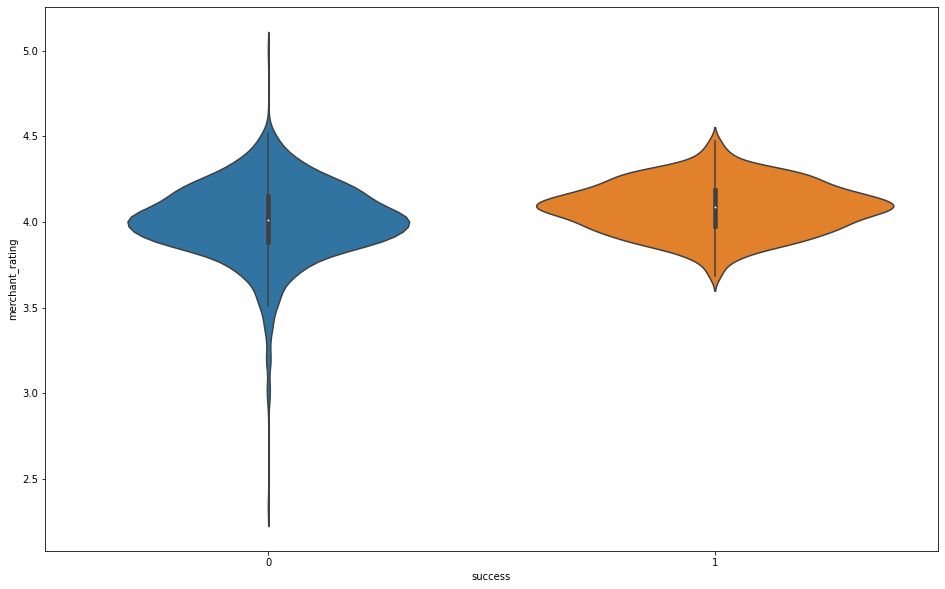

In [59]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.violinplot(data = df, x = 'success', y = 'merchant_rating')

In [60]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

In [61]:
df = df.drop(['crawl_month', 'product_id', 'product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id', 
              'currency_buyer', 'theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'title', 
              'title_orig', 'tags', 'shipping_option_name', 'inventory_total', 'badge_fast_shipping', 'badge_local_product', 
              'shipping_is_express', 'units_sold', 'rating_five_count','rating_four_count','rating_three_count', 
              'rating_two_count', 'rating_one_count'], axis = 'columns')

In [62]:
df

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_color,product_variation_size_id,product_variation_inventory,...,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tags_count,success,rating_one_count_proportion,rating_two_count_proportion,rating_three_count_proportion,rating_four_count_proportion,rating_five_count_proportion
0,16.00,14,0,3.76,54,0,0,white,m,50,...,568,4.128521,0,24,0,0.166667,0.018519,0.185185,0.148148,0.481481
1,8.00,22,1,3.45,6135,0,0,green,xs,50,...,17752,3.899673,0,15,1,0.175550,0.104971,0.182233,0.167400,0.369845
2,8.00,43,0,3.57,14,0,0,other,xs,1,...,295,3.989831,0,19,0,0.214286,0.000000,0.142857,0.285714,0.357143
3,8.00,8,1,4.03,579,0,0,black,m,50,...,23832,4.020435,0,18,1,0.062176,0.072539,0.150259,0.205527,0.509499
4,2.72,3,1,3.10,20,0,0,yellow,s,1,...,14482,4.001588,0,13,0,0.300000,0.100000,0.100000,0.200000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,1,4.08,1367,0,0,blue,s,50,...,5316,4.224605,0,24,1,0.065838,0.056328,0.135333,0.214338,0.528164
1569,2.00,56,1,3.07,28,0,0,blue,s,2,...,4435,3.696054,0,18,0,0.357143,0.107143,0.035714,0.107143,0.392857
1570,5.00,19,0,3.71,59,0,0,white,s,15,...,210,3.961905,0,12,0,0.152542,0.050847,0.135593,0.254237,0.406780
1571,13.00,11,0,2.50,2,0,0,white,s,36,...,31,3.774194,0,21,0,0.500000,0.000000,0.000000,0.500000,0.000000


In [63]:
df = pd.get_dummies(df, columns = ['product_color'], prefix = 'color', drop_first = True)
df.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_size_id,product_variation_inventory,shipping_option_price,...,color_dual,color_green,color_grey,color_orange,color_other,color_pink,color_purple,color_red,color_white,color_yellow
0,16.00,14,0,3.76,54,0,0,m,50,4,...,0,0,0,0,0,0,0,0,1,0
1,8.00,22,1,3.45,6135,0,0,xs,50,2,...,0,1,0,0,0,0,0,0,0,0
2,8.00,43,0,3.57,14,0,0,xs,1,3,...,0,0,0,0,1,0,0,0,0,0
3,8.00,8,1,4.03,579,0,0,m,50,2,...,0,0,0,0,0,0,0,0,0,0
4,2.72,3,1,3.10,20,0,0,s,1,1,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df = pd.get_dummies(df, columns = ['product_variation_size_id'], prefix = 'size', drop_first = True)
df.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_inventory,shipping_option_price,countries_shipped_to,...,color_yellow,size_m,size_other,size_s,size_xl,size_xs,size_xxl,size_xxxs,size_xxxxl,size_xxxxxl
0,16.00,14,0,3.76,54,0,0,50,4,34,...,0,1,0,0,0,0,0,0,0,0
1,8.00,22,1,3.45,6135,0,0,50,2,41,...,0,0,0,0,0,1,0,0,0,0
2,8.00,43,0,3.57,14,0,0,1,3,36,...,0,0,0,0,0,1,0,0,0,0
3,8.00,8,1,4.03,579,0,0,50,2,41,...,0,1,0,0,0,0,0,0,0,0
4,2.72,3,1,3.10,20,0,0,1,1,35,...,1,0,0,1,0,0,0,0,0,0


In [65]:
df = pd.get_dummies(df, columns = ['origin_country'], prefix = 'country', drop_first = True)
df.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_inventory,shipping_option_price,countries_shipped_to,...,size_xs,size_xxl,size_xxxs,size_xxxxl,size_xxxxxl,country_CN,country_GB,country_SG,country_US,country_VE
0,16.00,14,0,3.76,54,0,0,50,4,34,...,0,0,0,0,0,1,0,0,0,0
1,8.00,22,1,3.45,6135,0,0,50,2,41,...,1,0,0,0,0,1,0,0,0,0
2,8.00,43,0,3.57,14,0,0,1,3,36,...,1,0,0,0,0,1,0,0,0,0
3,8.00,8,1,4.03,579,0,0,50,2,41,...,0,0,0,0,0,1,0,0,0,0
4,2.72,3,1,3.10,20,0,0,1,1,35,...,0,0,0,0,0,1,0,0,0,0


In [66]:
df.dtypes

price                            float64
retail_price                       int64
uses_ad_boosts                     int64
rating                           float64
rating_count                       int64
badges_count                       int64
badge_product_quality              int64
product_variation_inventory        int64
shipping_option_price              int64
countries_shipped_to               int64
has_urgency_banner               float64
merchant_rating_count              int64
merchant_rating                  float64
merchant_has_profile_picture       int64
tags_count                         int64
success                            int64
rating_one_count_proportion      float64
rating_two_count_proportion      float64
rating_three_count_proportion    float64
rating_four_count_proportion     float64
rating_five_count_proportion     float64
color_blue                         uint8
color_brown                        uint8
color_dual                         uint8
color_green     

In [67]:
df.isna().any().to_frame()

,0
price,False
retail_price,False
uses_ad_boosts,False
rating,False
rating_count,False
badges_count,False
badge_product_quality,False
product_variation_inventory,False
shipping_option_price,False
countries_shipped_to,False


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(df.drop(['success'], axis = 'columns'), df['success'], test_size = 0.3, random_state = 1, stratify = df['success'])

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9661016949152542

<AxesSubplot:ylabel='feature'>

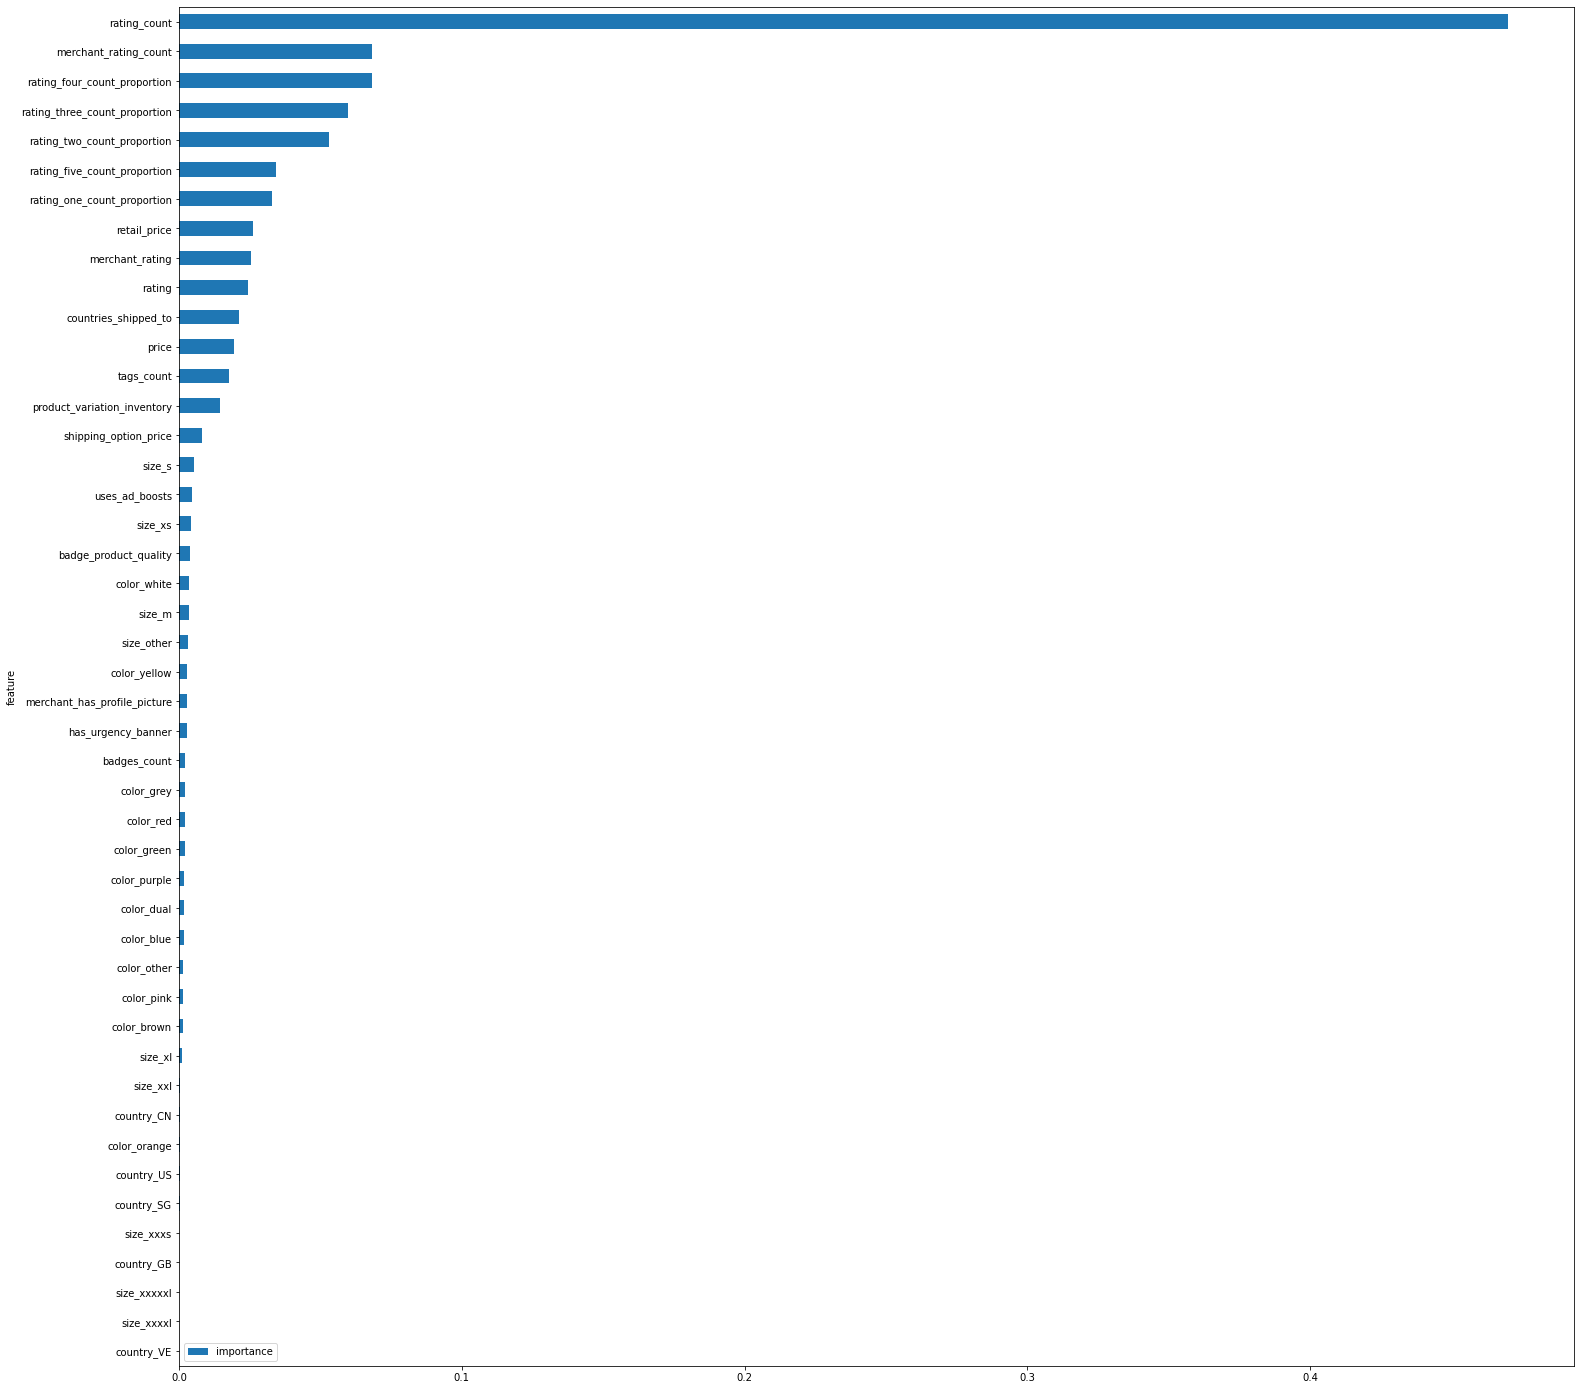

In [70]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

It looks like rating count has too much effect on our target variable.
Lets try to remove this see the graph again

<AxesSubplot:ylabel='feature'>

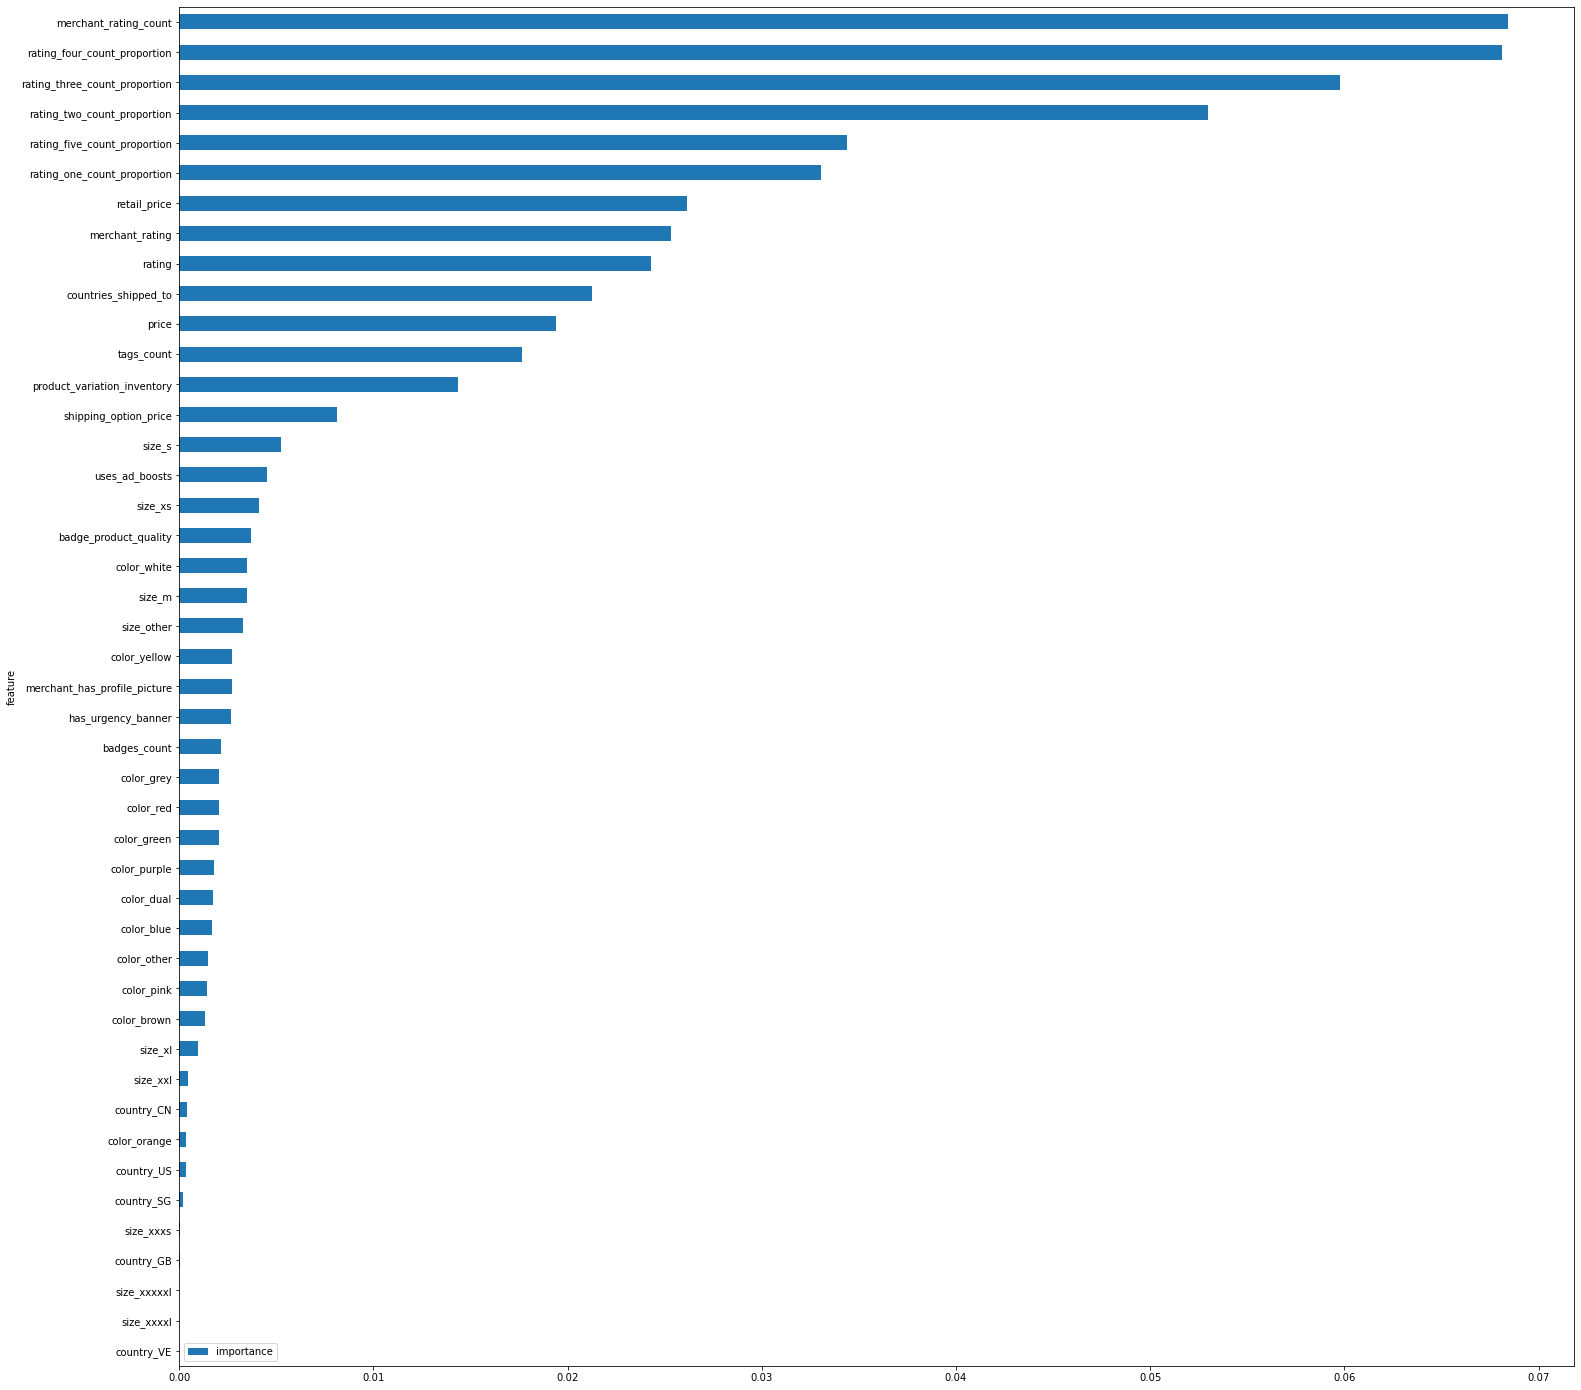

In [71]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features = features[features['feature']!='rating_count']
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [72]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
print(train_reduced.shape)

test_reduced = model.transform(X_test)
print(test_reduced.shape)

(1101, 10)
(472, 10)


The result are not that different, lets try PCA and see if we can improve the accuracy 

In [73]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

#sc = StandardScaler()
#train_scaled = sc.fit_transform(X_train)
#test_scaled = sc.transform(X_test)

#pca = PCA(n_components=20)
#train_reduced = pca.fit_transform(train_scaled)
#test_reduced = pca.transform(test_scaled)
#print(train_reduced.shape)
#print(test_reduced.shape)

In [74]:
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [75]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [76]:
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
gnb = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()
xgboost = XGBClassifier()
dc = DecisionTreeClassifier()
adc = AdaBoostClassifier()
models = [logreg, logreg_cv, rf, gboost, gnb, svm, knn, xgboost, dc, adc]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.9391238173591114
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.9345865898807075
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.9345948169477583
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.9309707939119705
****
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 0.9109790209790211
****
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV score = 0.6957136980666393
****
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV score = 0.8701192924722336
****
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
[20:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric u

In [77]:
clf = XGBClassifier()
clf.fit(train_reduced, y_train)

y_pred = clf.predict(test_reduced)

accuracy_score(y_pred, y_test)

[20:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9597457627118644